# Tirgul 3

# Topics
* PCA

# Principal Component Analysis 

Principal Component Analysis, or PCA for short, is a method for reducing the dimensionality of data.

It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data.

The PCA method can be described and implemented using the tools of linear algebra.

PCA is an operation applied to a dataset, represented by an n x m matrix A that results in a projection of A which we will call B.

By default, PCA creates as many axes as there are dimensions to a given dataset but it ranks these directions, called principal components (PCs), in the order of importance: the first PC always captures the most amount of data variance possible, the second one shows the second-largest amount of variance, and so forth.

After the data has been projected into this new subspace, we might drop out some of the axes and thus reduce dimensionality without losing much important information.

For more details on the steps: 

https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

### How does PCA work?

1. Imagine this is our dataset that we’re trying to cluster; we only have two dimensions.


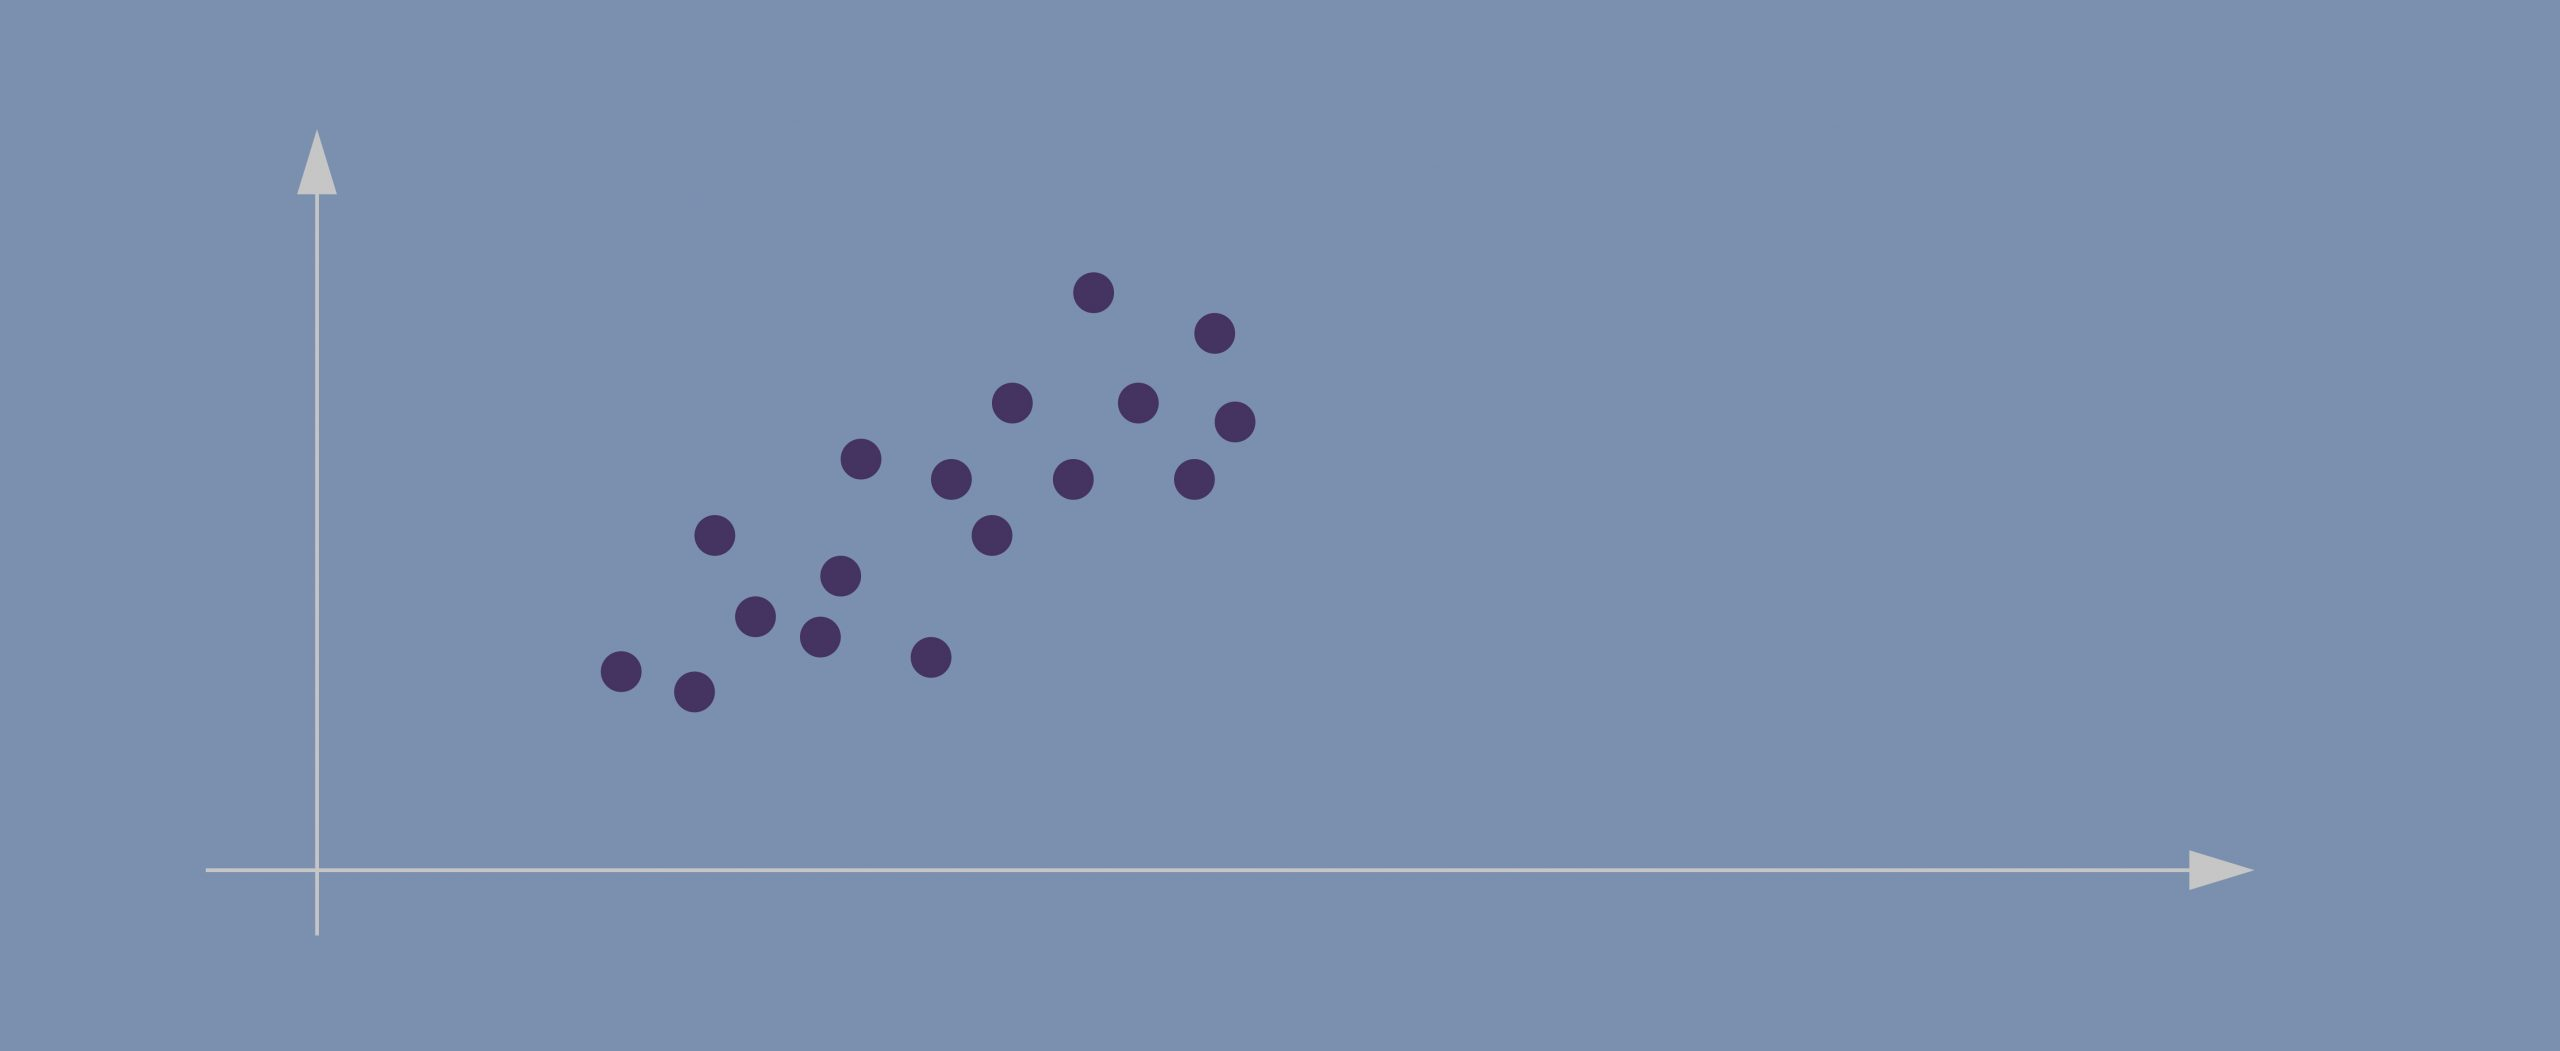

In [1]:
%matplotlib inline
from IPython.display import Image
Image('image_1.png')

2. If we project the data onto the horizontal axis (our attribute 1) we won’t see much spread; it will show a nearly equal distribution of the observations.
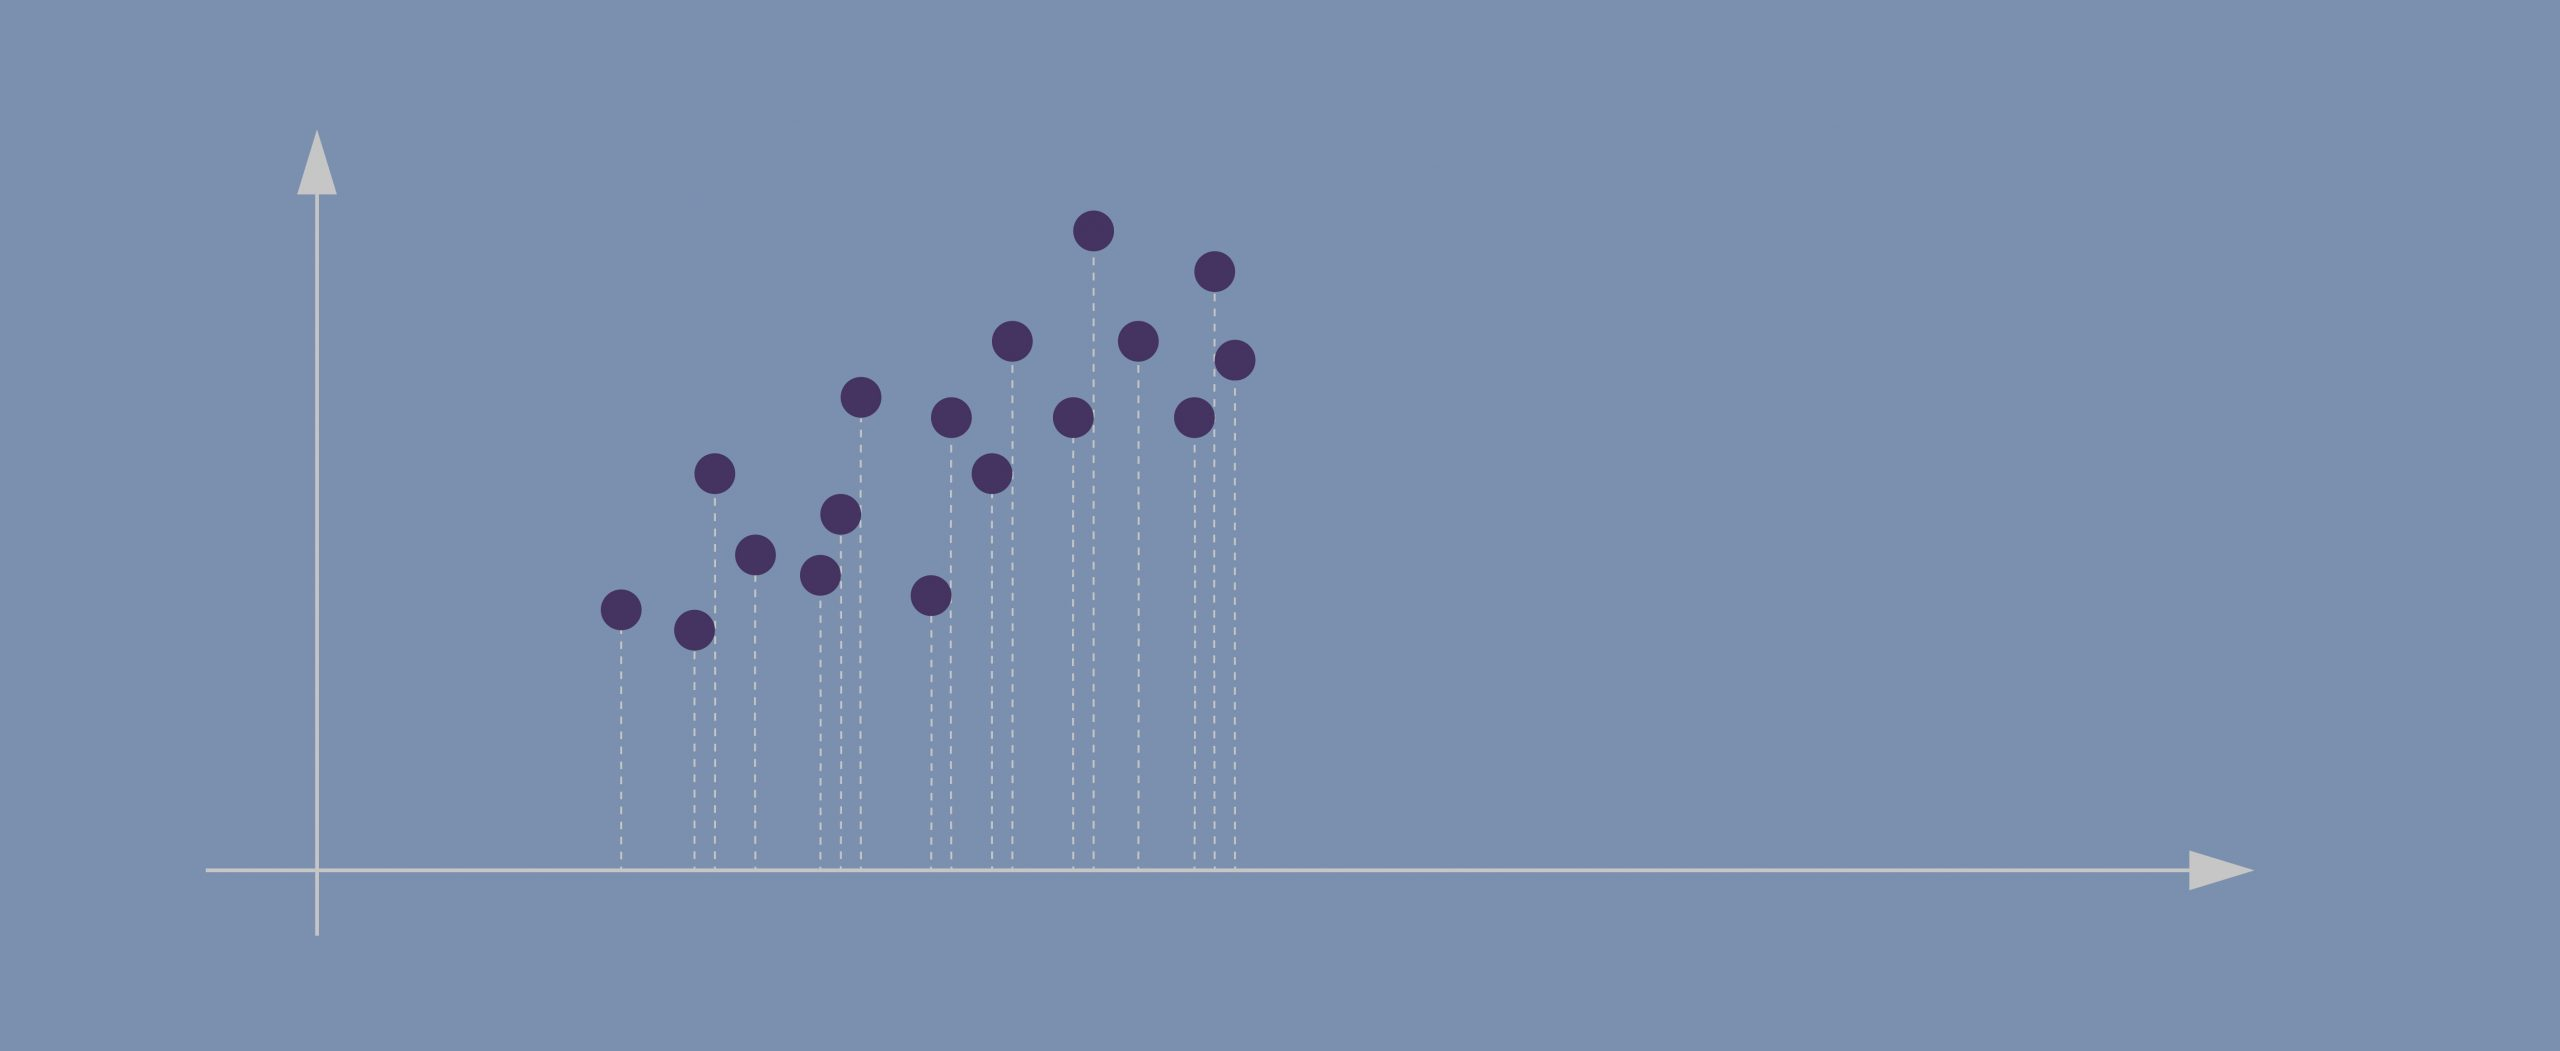
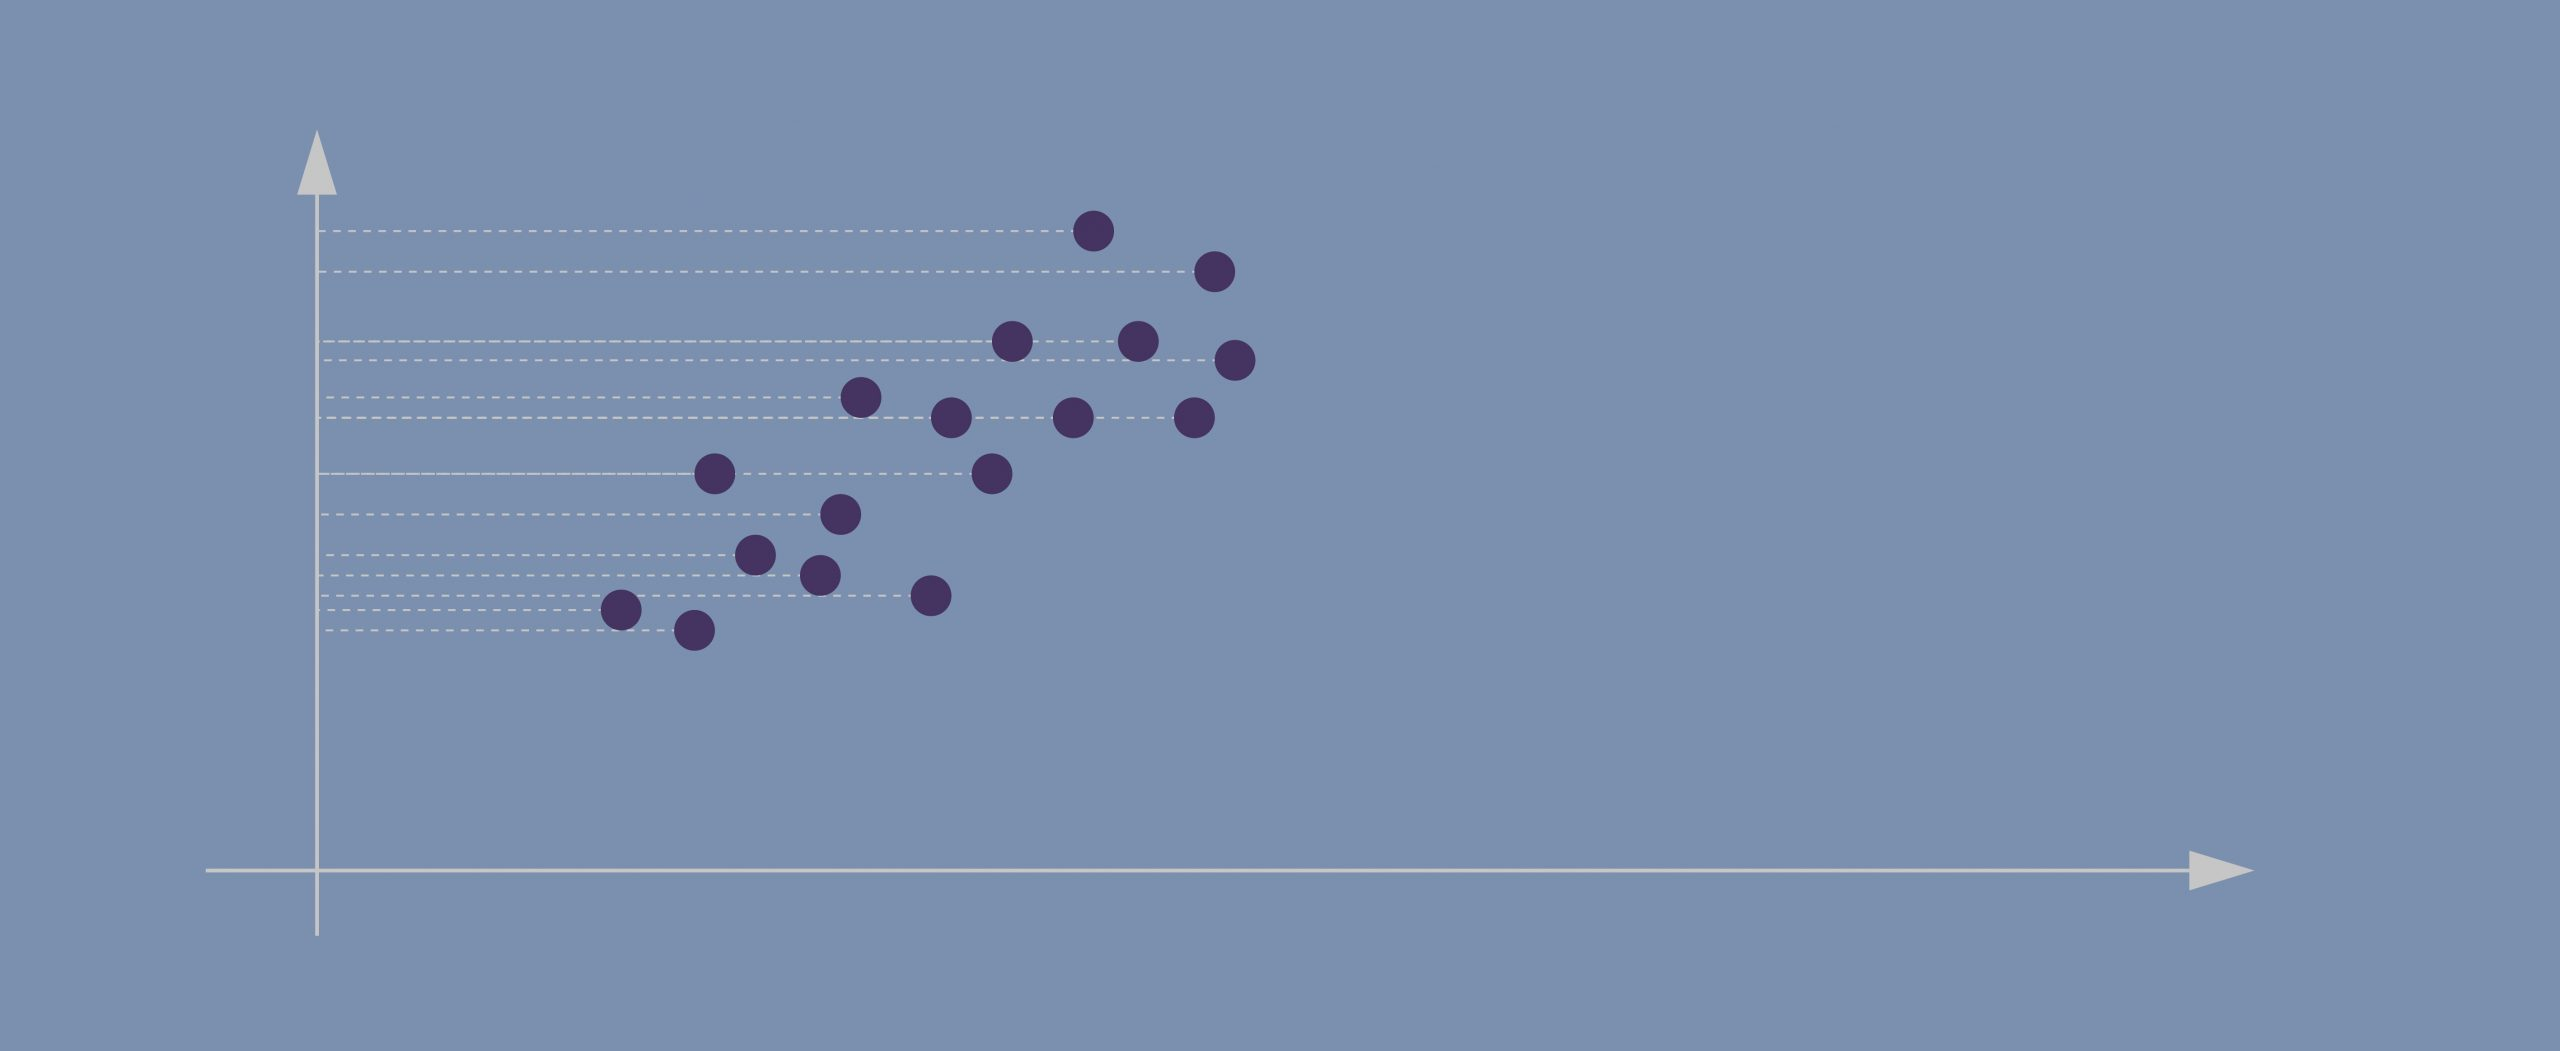
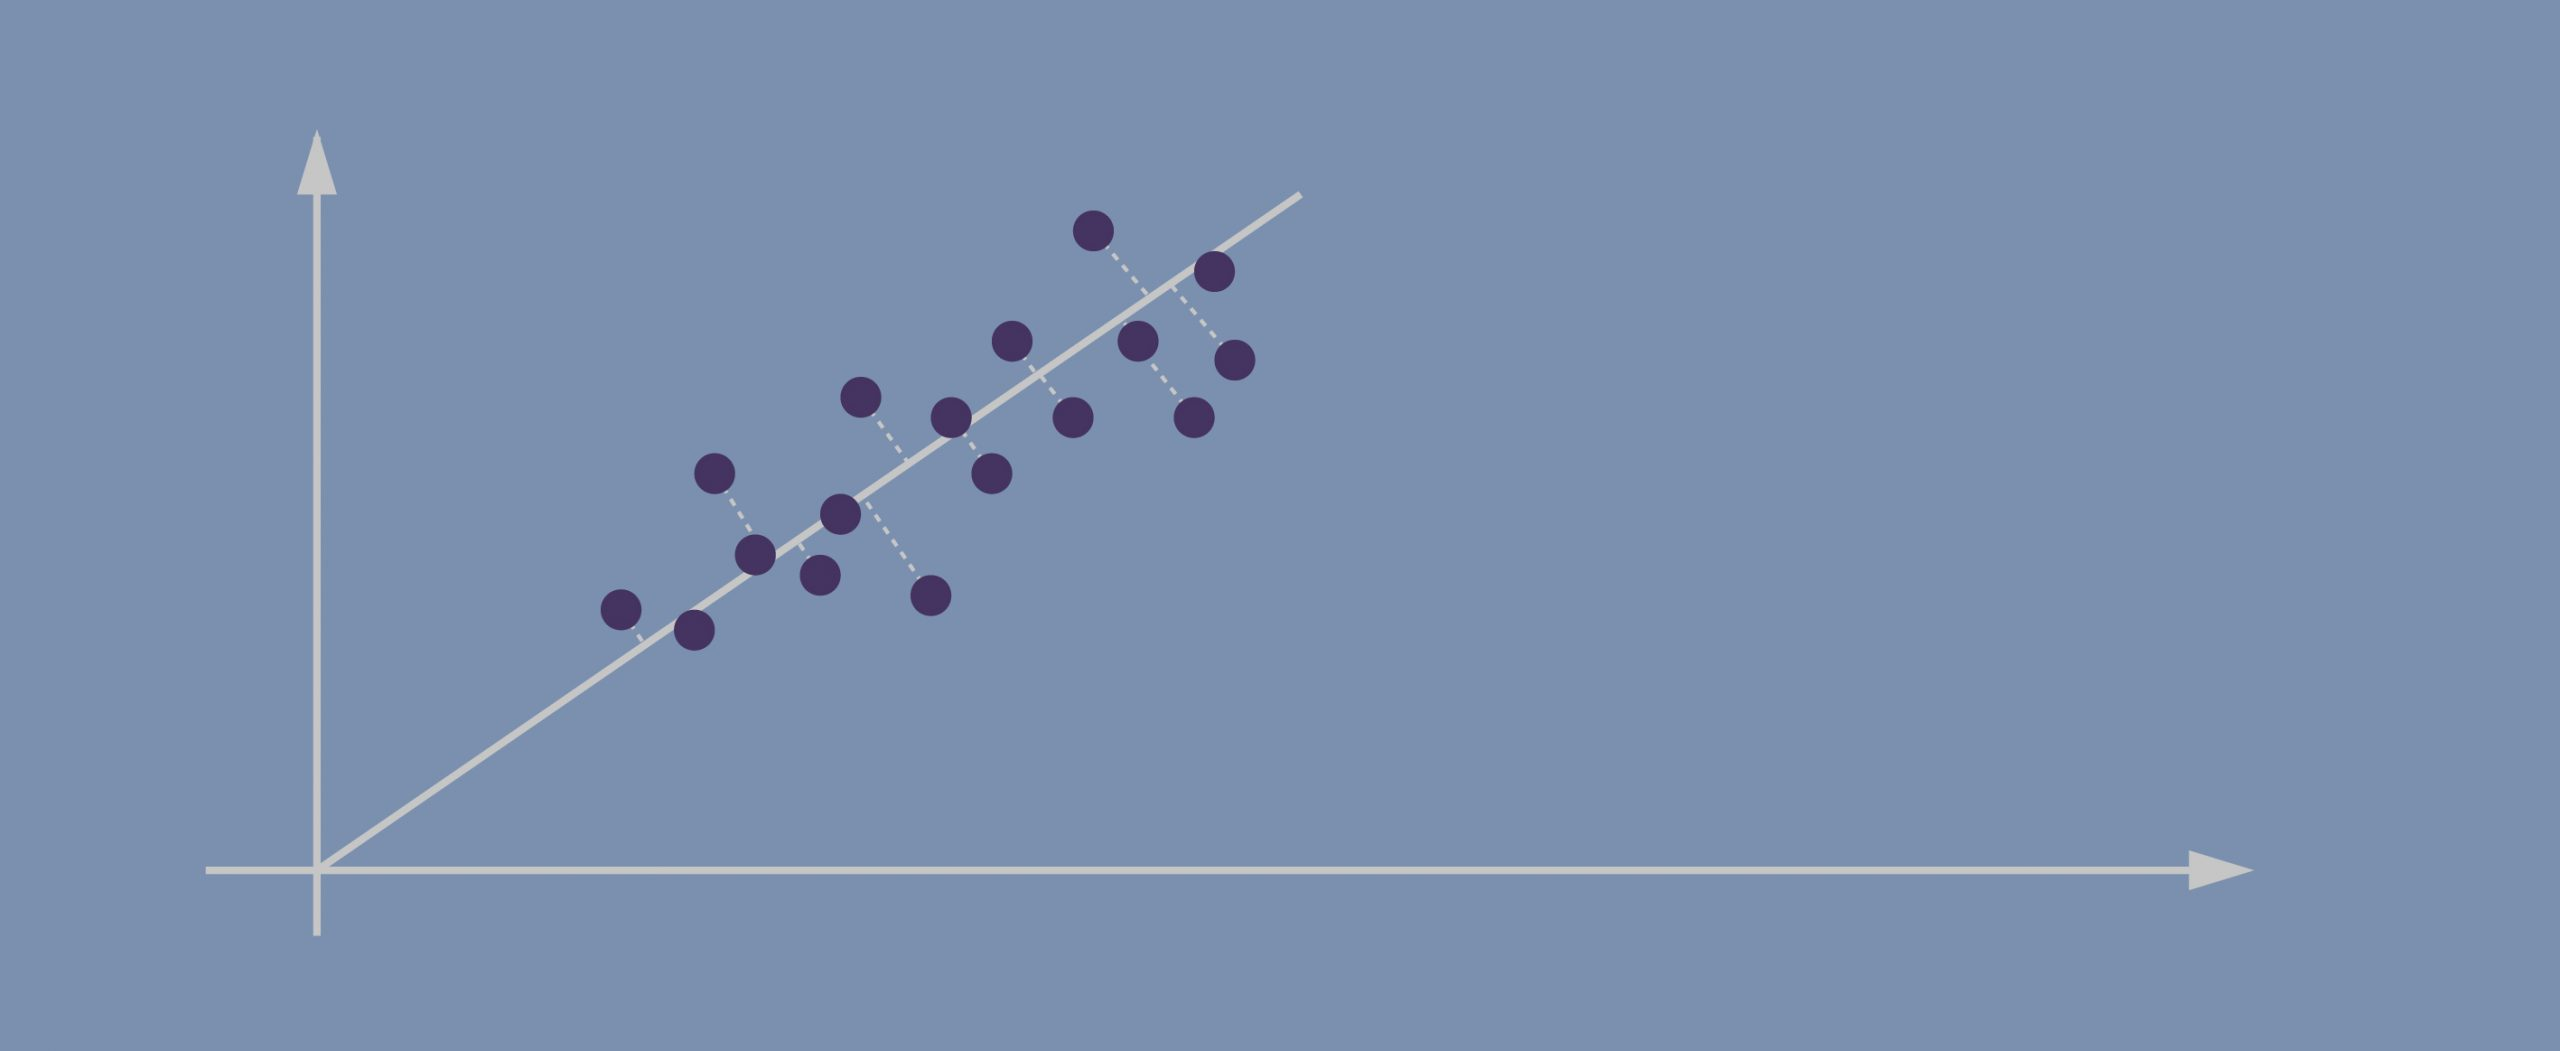
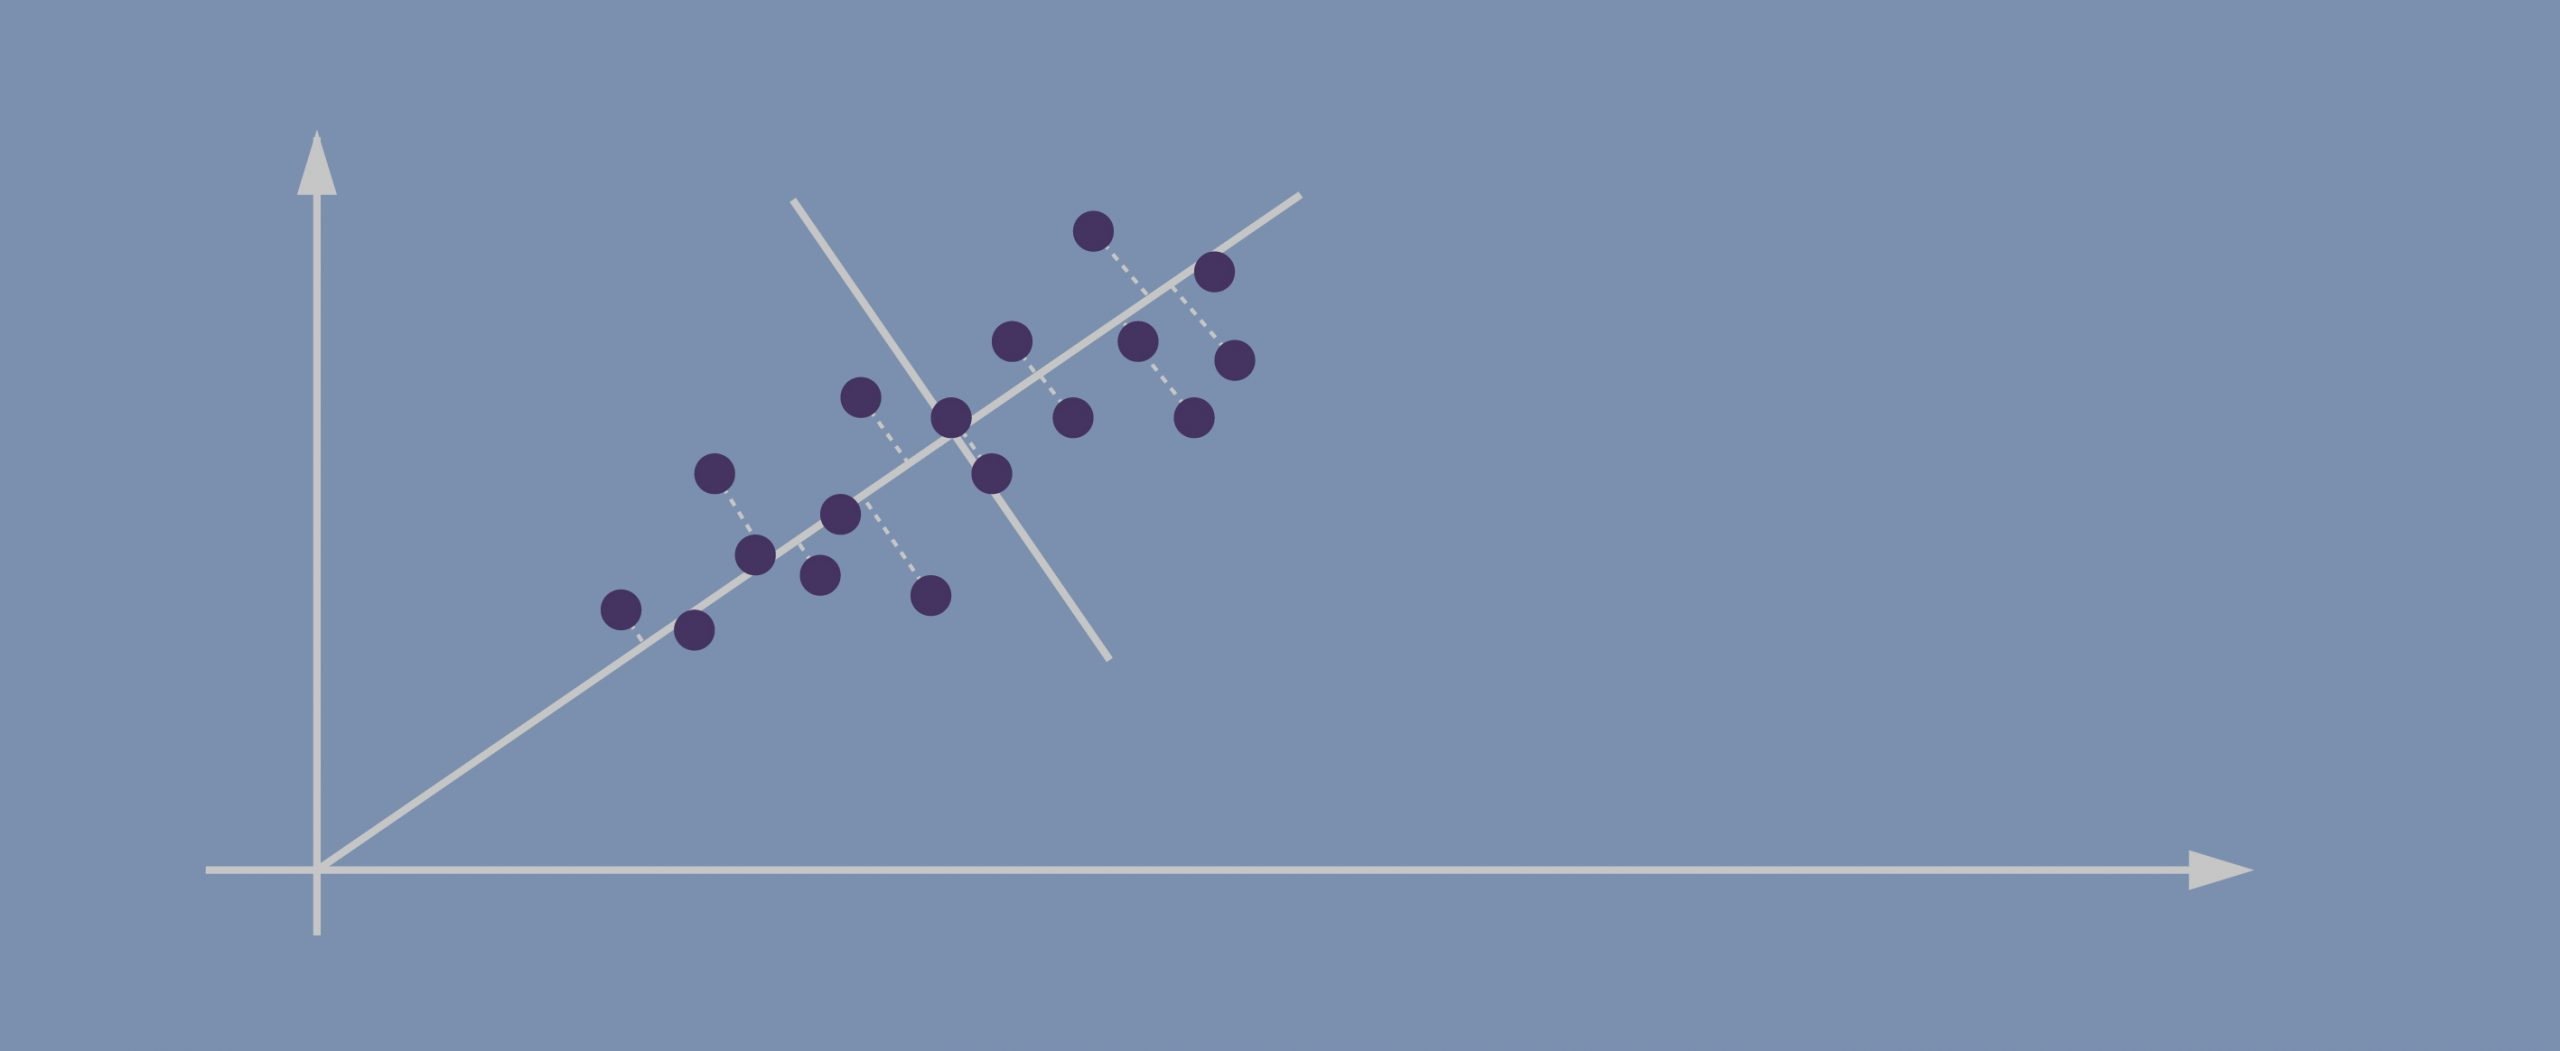
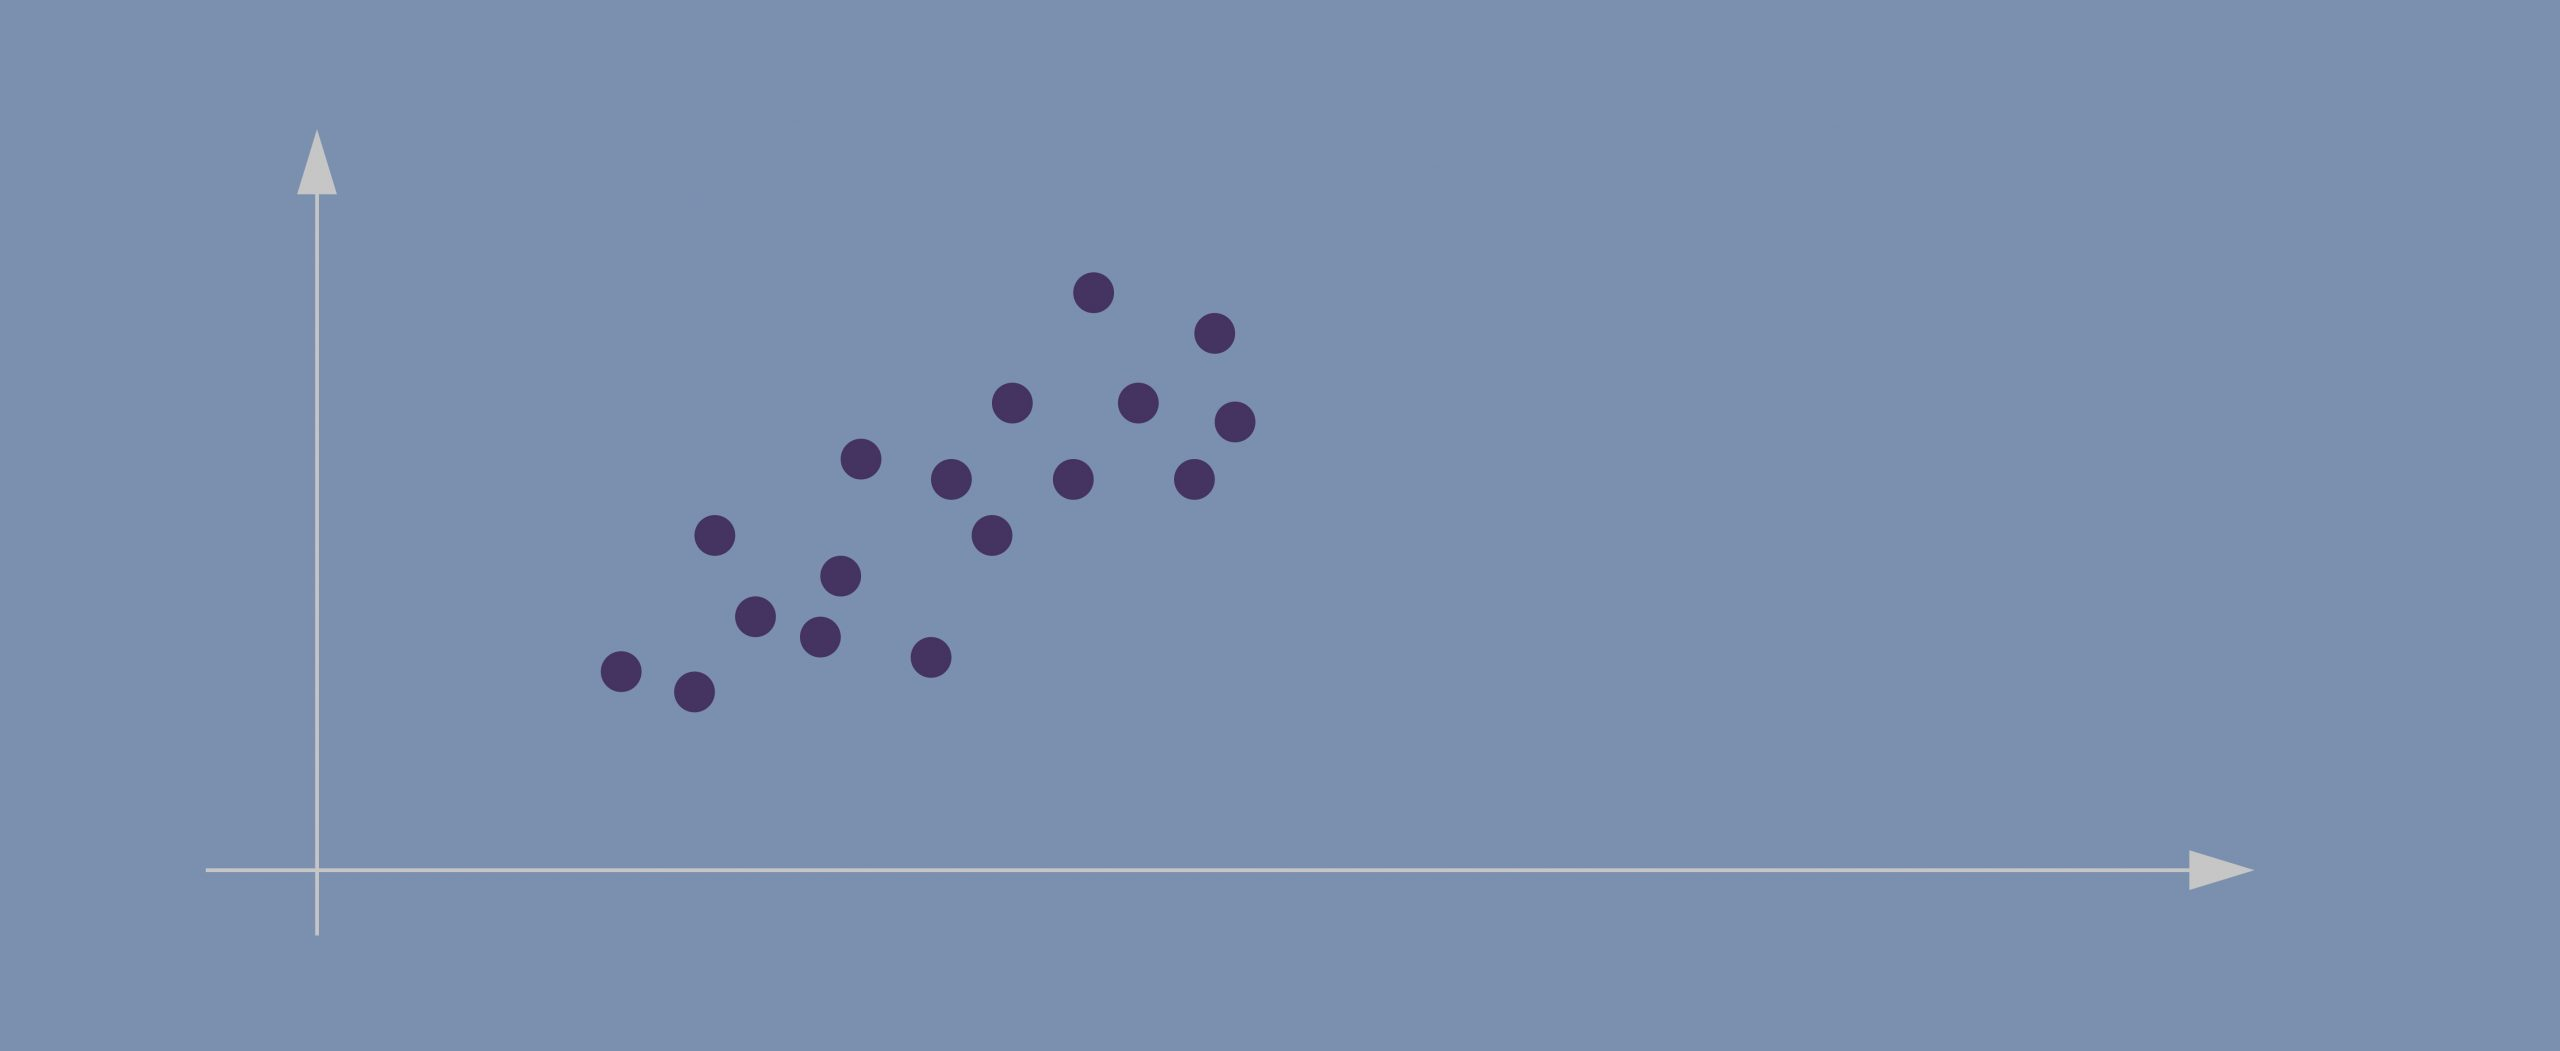

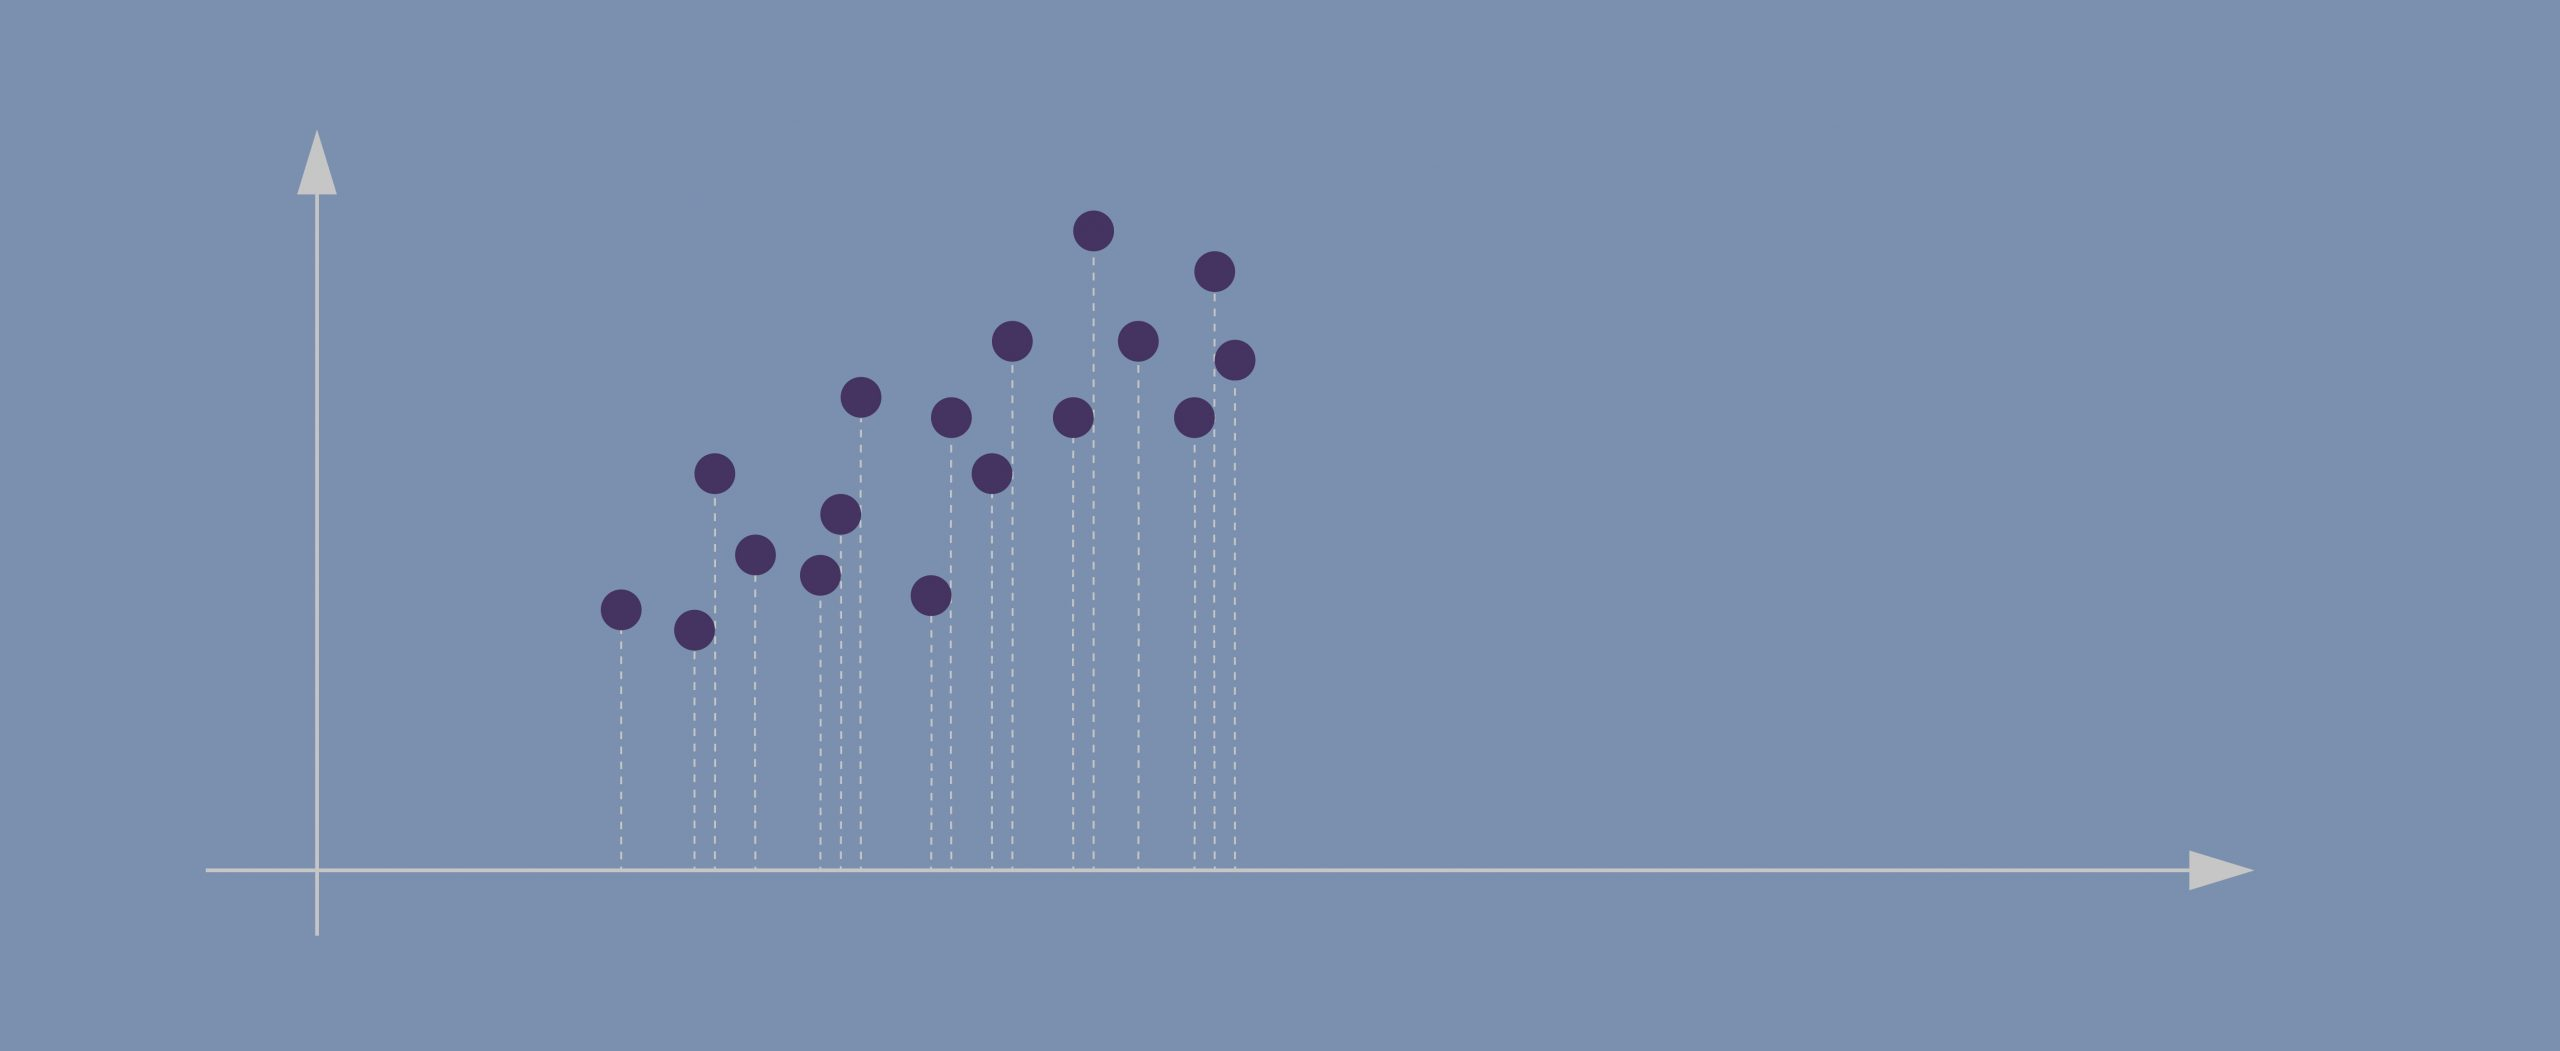

In [2]:
Image('image_2.png')

3. Attribute 2, obviously, isn’t hugely helpful either.

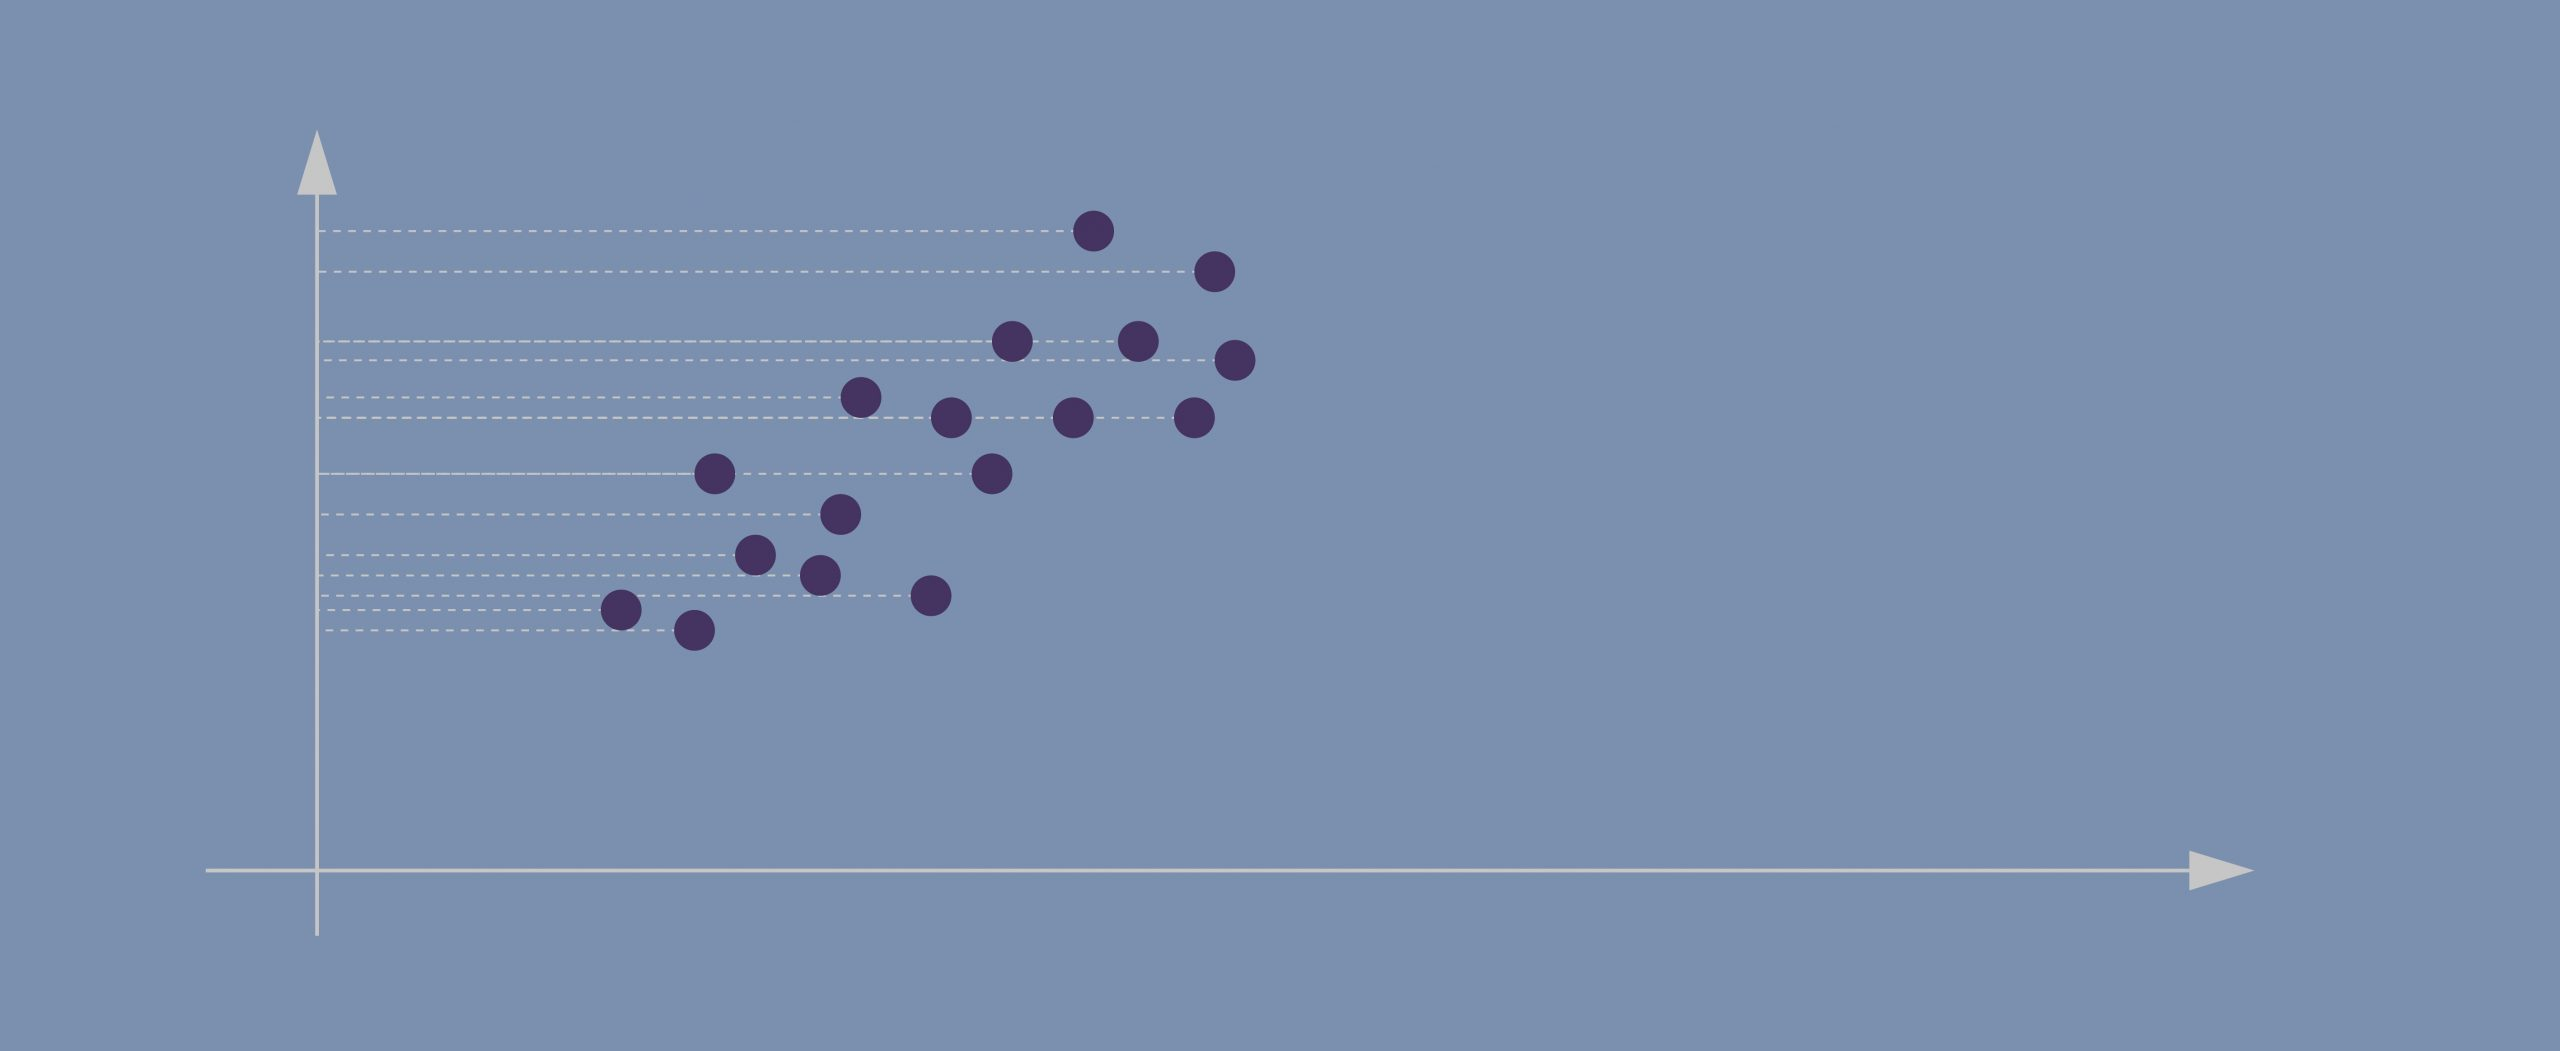

In [3]:
Image('image_3.png')

4. Evidently, the data points in our case are spreading diagonally so we need a new line that would better capture this.

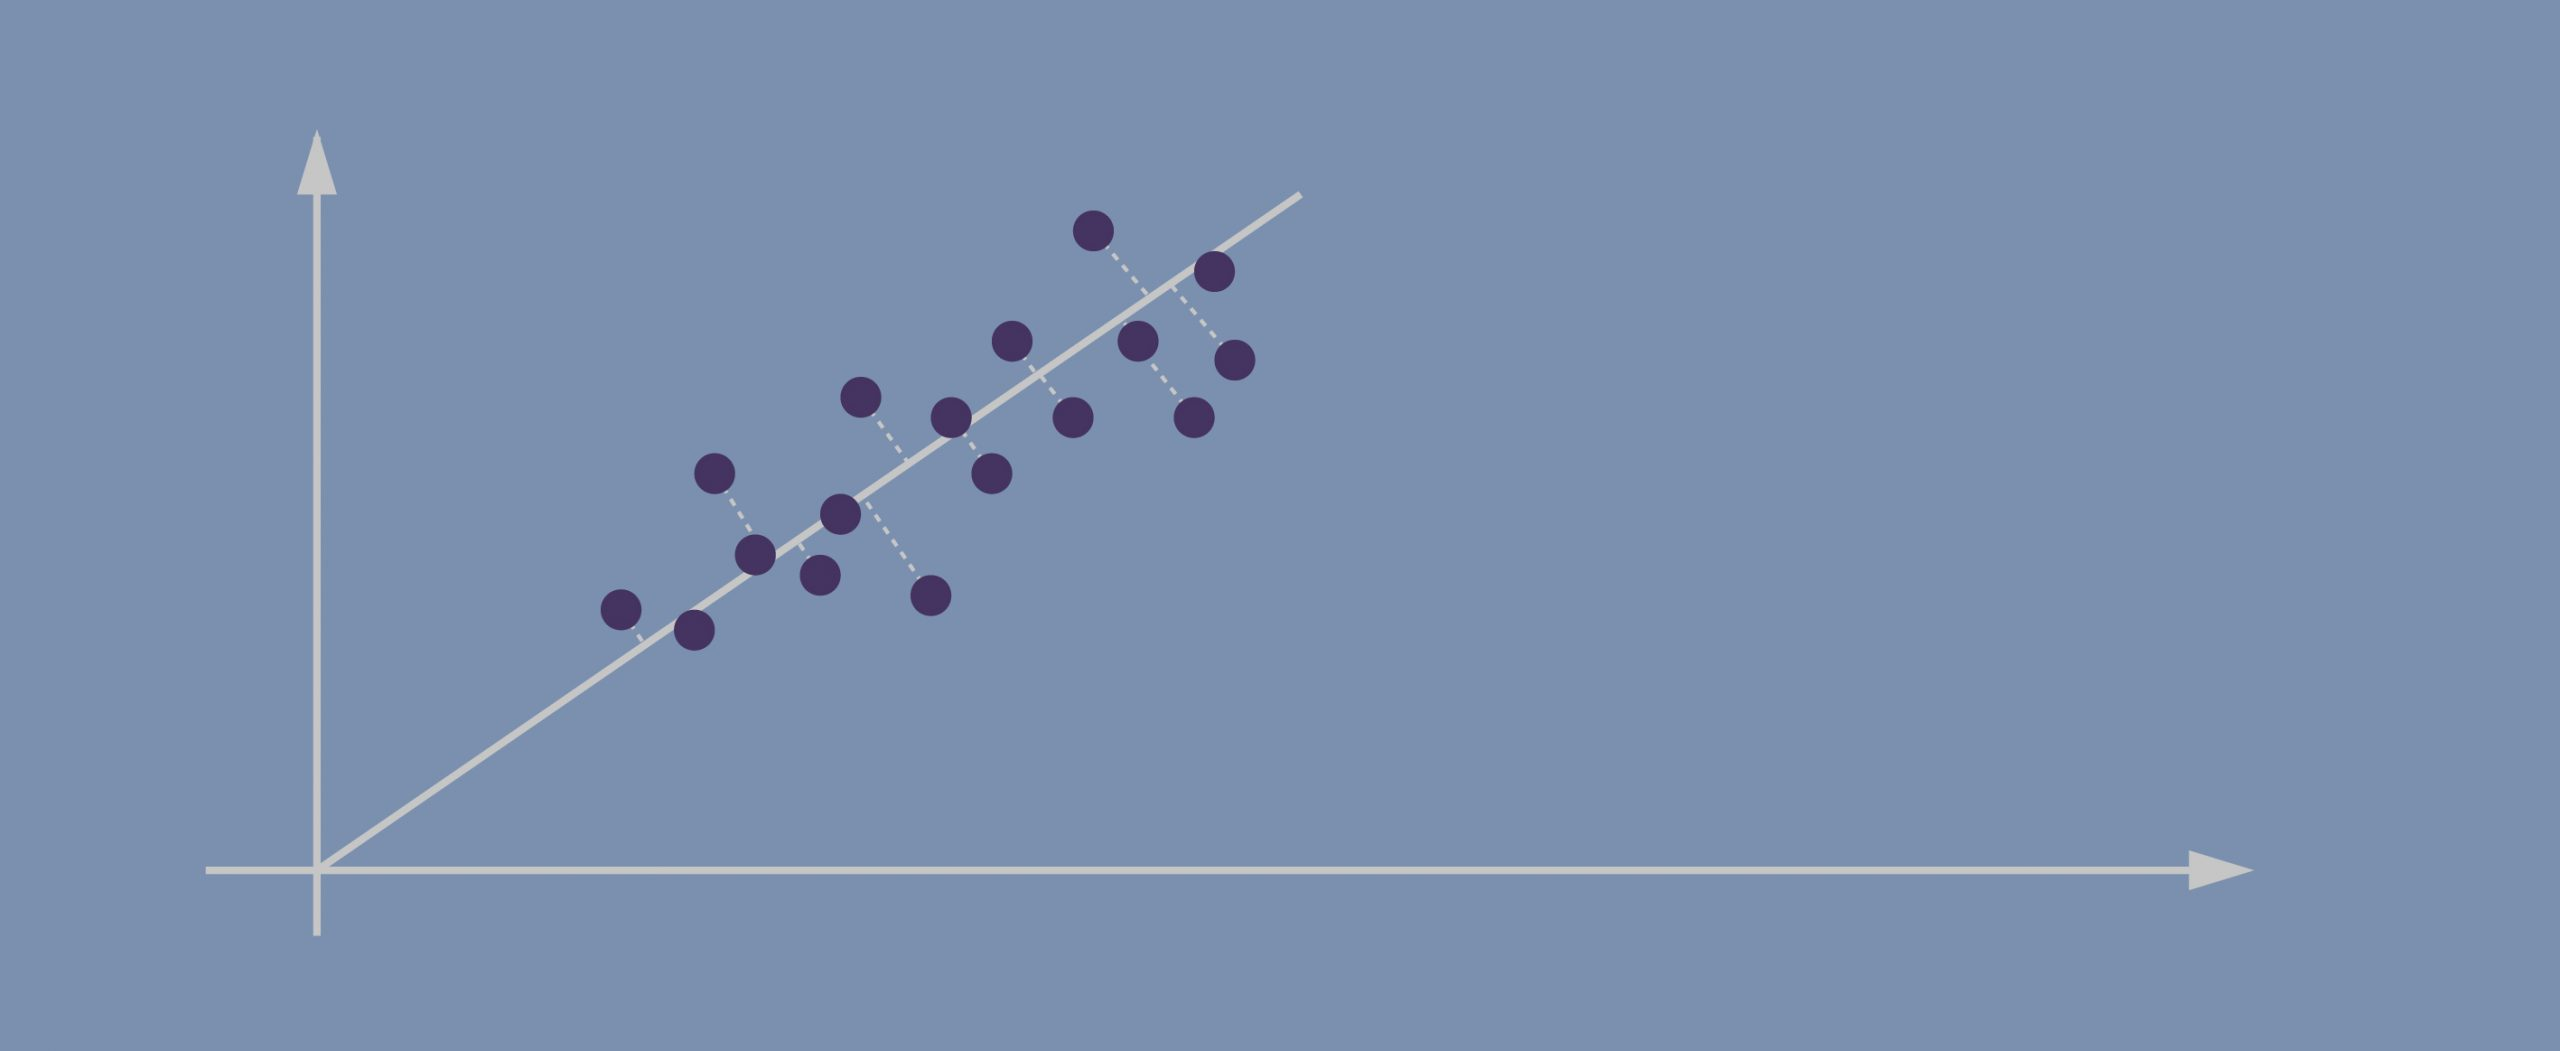

In [4]:
Image('image_4.png')

5. The second PC must represent the second maximum amount of variance; it’s going to be a line that’s orthogonal to our first axis.
*Due to PCA’s math being based on eigenvectors and eigenvalues, new principal components will always come out orthogonal to the ones before them.

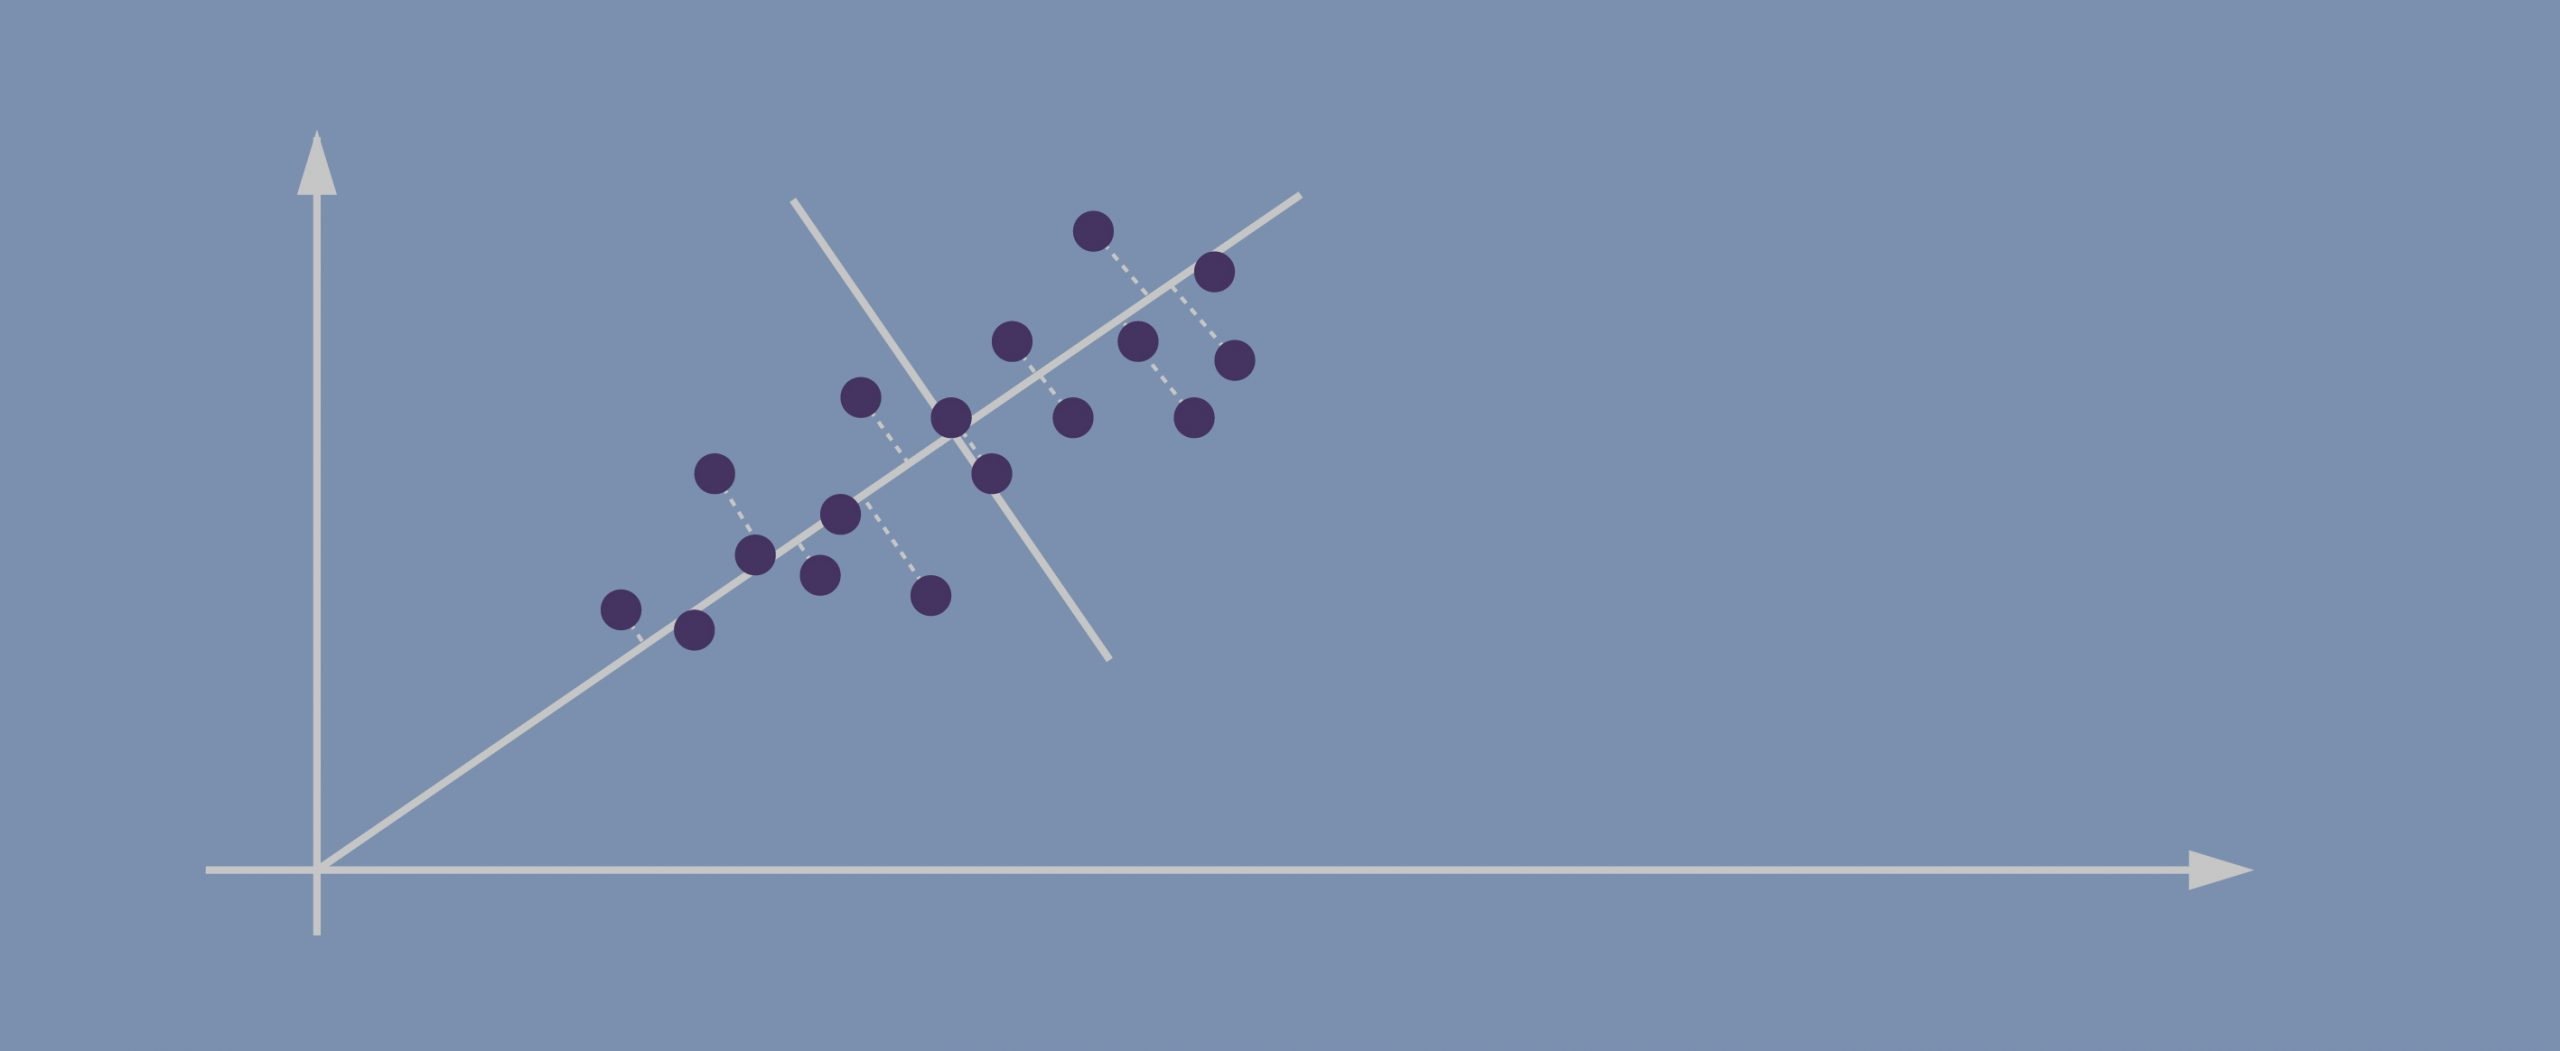

In [5]:
Image('image_5.png')

#### Important!

Before applying PCA, we must ensure that all our attributes (dimensions) are centered around zero and have a standard deviation of 1. The method won’t work if we have entirely different scales for our data.

## Example

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [7]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

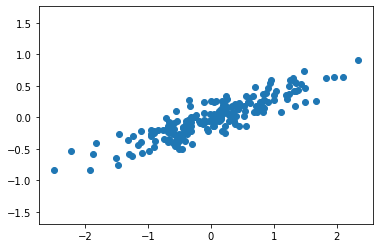

In [9]:
# create and plot some random data 
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [10]:
# use sklearn to do PCA
pca = PCA(n_components=2)
pca.fit(X);

In [11]:
# get components
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [12]:
# get explained variance
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector.

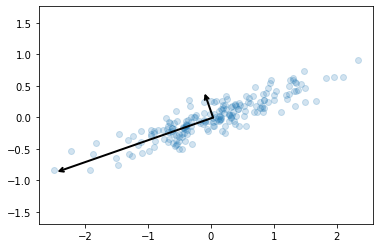

In [13]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

### Dimensional reduction
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [14]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data.

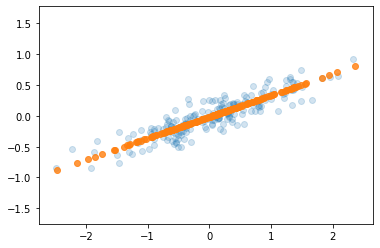

In [15]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### Example 2: PCA to Speed-up Machine Learning Algorithms

The MNIST database of handwritten digits has 784 feature columns (784 dimensions).

We can break it into a training set of 60,000 examples, and a test set of 10,000 examples.

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [26]:
# get MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [17]:
# the data consists of images -- there are 70,000 images with 784 dimensions (784 features)
mnist.data.shape

(70000, 784)

In [18]:
# each image is a number
mnist.target[0:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [27]:
# split into training and test sets
from sklearn.model_selection import train_test_split

# test_size: what proportion of original data is used for test set
test_size = 1/7.0
(train_img, 
 test_img, 
 train_lbl, 
 test_lbl) = train_test_split(mnist.data, 
                              mnist.target, 
                              test_size=test_size, 
                              random_state=0)

In [20]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit on training set only.
scaler.fit(train_img)

# apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

### Apply PCA

In [21]:
# make an instance of the model
pca = PCA(.95)

#### Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [22]:
# fit on training data set
pca.fit(train_img)

PCA(n_components=0.95)

In [23]:
# how many components are there?
pca.n_components_

327

## What do we gain from this?

In [24]:
# apply the transform to both the training set and the test set.
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [25]:
# let's make a logistic model
from sklearn.linear_model import LogisticRegression

# default solver is incredibly slow so changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=1000)

# train model
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=1000)

In [88]:
# predict for multiple observations (images) at once
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [79]:
# how does the model do?
score = logisticRegr.score(test_img, test_lbl)

0.9185


In [90]:
# how does changing the amount of variance affect the model?

In [82]:
pd.DataFrame(data = [[1.00, 784, 48.94, .9158],
                     [.99, 541, 34.69, .9169],
                     [.95, 330, 13.89, .92],
                     [.90, 236, 10.56, .9168],
                     [.85, 184, 8.85, .9156]], 
             columns = ['Variance Retained',
                      'Number of Components', 
                      'Time (seconds)',
                      'Accuracy'])

,Variance Retained,Number of Components,Time (seconds),Accuracy
0,1.00,784,48.94,0.9158
1,0.99,541,34.69,0.9169
2,0.95,330,13.89,0.9200
3,0.90,236,10.56,0.9168
4,0.85,184,8.85,0.9156
